# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Dyah Megawati
- **Email:** dyah.megawati0402@mail.ugm.ac.id
- **ID Dicoding:** dyah_megawati_gFa2

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa dampak cuaca terhadap frekuensi penyewaan sepeda?
- Pertanyaan 2 : Apakah ada perbedaan antara penyewaan sepeda antara Weekday atau hari kerja (Senin-Jumat) dan Weekend atau akhir pekan (Sabtu-Minggu)?
- Pertanyaan analisis lebih lanjut : Pengaruh suhu dan cuaca terhadap jumlah penyewa?

## Import Semua Packages/Library yang Digunakan

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

# Gathering Data

In [32]:
day_df = pd.read_csv("C:/Users/INFINIX/Downloads/Proyek_Analisis_Data_Dyah/data/day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [33]:
hour_df = pd.read_csv("C:/Users/INFINIX/Downloads/Proyek_Analisis_Data_Dyah/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Data ini berisi kolom-kolom seperti: *season* (musim: 1-musim semi, 2-musim panas, 3-musim gugur, 4-musim dingin), *weathersit* (cuaca: 1-cerah, 2-mendung, 3-hujan), *workingday* (hari kerja: 1-ya, 0-tidak), *holiday* (libur: 1-ya, 0-tidak), *temp* dan *atemp* (suhu aktual dan suhu yang terasa), serta *hum* (kelembaban) dan *windspeed* (kecepatan angin). Kolom *casual* mencatat jumlah pengguna sepeda biasa, sedangkan *registered* mencatat pengguna terdaftar. Data ini juga mencakup penyewaan sepeda per jam serta faktor hari, cuaca, dan musim.

# Assessing Data



In [34]:
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [35]:
# Memeriksa keberadaan data duplikat di dataset hour_df
jumlah_duplikat_hour = hour_df.duplicated().sum()
print(f"Total duplikat di hour_df: {jumlah_duplikat_hour}")

# Memeriksa keberadaan data duplikat di dataset day_df
jumlah_duplikat_day = day_df.duplicated().sum()
print(f"Total duplikat di day_df: {jumlah_duplikat_day}")


Total duplikat di hour_df: 0
Total duplikat di day_df: 0


In [36]:
hour_df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [37]:
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight** :

-Data ini memuat informasi terkait penggunaan layanan berdasarkan beberapa variabel, termasuk rata-rata total pengguna, dengan rincian antara pengguna biasa (casual) dan pengguna terdaftar (registered), jam penggunaan dengan puncaknya antara 12 hingga 18, data musim, indeks cuaca, serta jenis hari.

-Tidak ditemukan data duplikat pada kedua dataset, hal ini penting untuk memastikan keakuratan dalam analisis.


### Cleaning Data

In [38]:
# Meniadakan kolom yang tidak digunakan atau diperlukan
columns_to_drop_hour = ['instant']
columns_to_drop_day = ['instant']

# Membuat salinan data yang sudah di-cleaning
hour_df_cleaned = hour_df.drop(columns=columns_to_drop_hour)
day_df_cleaned = day_df.drop(columns=columns_to_drop_day)

# Mengganti nama kolom untuk kemudahan
hour_df_cleaned.rename(columns={'dteday': 'date'}, inplace=True)
day_df_cleaned.rename(columns={'dteday': 'date'}, inplace=True)

# Mengganti kolom 'date' menjadi tipe datetime
hour_df_cleaned['date'] = pd.to_datetime(hour_df_cleaned['date'])
day_df_cleaned['date'] = pd.to_datetime(day_df_cleaned['date'])

# Mengecek kembali missing values
print("Missing values di hour_df_cleaned:")
print(hour_df_cleaned.isnull().sum())

print("\nMissing values di day_df_cleaned:")
print(day_df_cleaned.isnull().sum())

# Memeriksa terdapat duplikat pada dataset yang sudah dibersihkan
jumlah_duplikat_hour_cleaned = hour_df_cleaned.duplicated().sum()
jumlah_duplikat_day_cleaned = day_df_cleaned.duplicated().sum()
print(f"\nTotal entri duplikat di hour_df_cleaned: {jumlah_duplikat_hour_cleaned}")
print(f"Total entri duplikat di day_df_cleaned: {jumlah_duplikat_day_cleaned}")


Missing values di hour_df_cleaned:
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values di day_df_cleaned:
date          0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Total entri duplikat di hour_df_cleaned: 0
Total entri duplikat di day_df_cleaned: 0


In [39]:
print(day_df_cleaned.head())
print(day_df_cleaned.columns)
print(day_df_cleaned.dtypes)
print(day_df_cleaned.isnull().sum())
print(day_df_cleaned['weathersit'].unique())
print(day_df_cleaned['cnt'].describe())


        date  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1        0        6           0           2   
1 2011-01-02       1   0     1        0        0           0           2   
2 2011-01-03       1   0     1        0        1           1           1   
3 2011-01-04       1   0     1        0        2           1           1   
4 2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600  
Index(['date', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum

**Insight:**

- Tidak ada missing values pada dataset (hour_df_cleaned dan day_df_cleaned).


## Exploratory Data Analysis (EDA)

**Explore Data**

In [40]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [41]:
day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [42]:
day_df.groupby(by="season")['cnt'].sum().sort_values(ascending=False).reset_index().head(10)

,season,cnt
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


In [43]:
day_df.groupby(by="weathersit")['cnt'].sum().sort_values(ascending=False).reset_index().head(10)


,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


In [44]:
# Tambahkan kolom 'day_of_week' yang menjelaskan day of week
day_df_cleaned['day_of_week'] = day_df_cleaned['date'].dt.dayofweek

# fyi : 0: Senin, 1: Selasa, 2: Rabu, 3: Kamis, 4: Jumat, 5: Sabtu, 6: Minggu

# Membagi weekday dan weekend
weekday_df = day_df_cleaned[day_df_cleaned['day_of_week'] < 5]  # Senin-Jumat
weekend_df = day_df_cleaned[day_df_cleaned['day_of_week'] >= 5]  # Sabtu-Minggu

#Jumlah penyewaan sepeda rata-rata pada Weekday dan Weekend
print("Total Jumlah penyewaan sepeda rata-rata pada Weekday:", weekday_df['cnt'].mean())
print("Total Jumlah penyewaan sepeda rata-rata pada Weekend:", weekend_df['cnt'].mean())




Total Jumlah penyewaan sepeda rata-rata pada Weekday: 4550.5662188099805
Total Jumlah penyewaan sepeda rata-rata pada Weekend: 4389.685714285714


**Insight :**

-Cuaca cerah atau berawan ringan (kondisi cuaca 1) mencatat penyewaan tertinggi dengan total 2,257,952 penyewaan. Cuaca berkabut atau mendung (kondisi cuaca 2) mencatat 996,858 penyewaan, sedangkan cuaca salju ringan atau hujan ringan (kondisi cuaca 3) hanya mencapai 37,869 penyewaan. Cuaca yang baik memiliki pengaruh besar terhadap jumlah penyewaan sepeda.

-Penyewaan sepeda tertinggi terjadi pada musim panas (season 3) dengan total 1,061,129 penyewaan. Musim semi (season 2) berada di posisi kedua dengan 918,589 penyewaan. Musim gugur (season 4) mencatat 841,613 penyewaan, sementara musim dingin (season 1) menjadi yang terendah dengan 471,348 penyewaan.

-Rata-rata penyewaan sepeda pada hari kerja (Senin-Jumat) adalah 4,550 sepeda per hari, sedikit lebih tinggi dibandingkan akhir pekan (Sabtu-Minggu) yang rata-ratanya 4,389 sepeda per hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Kondisi Cuaca Terhadap Jumlah Penyewaan Sepeda

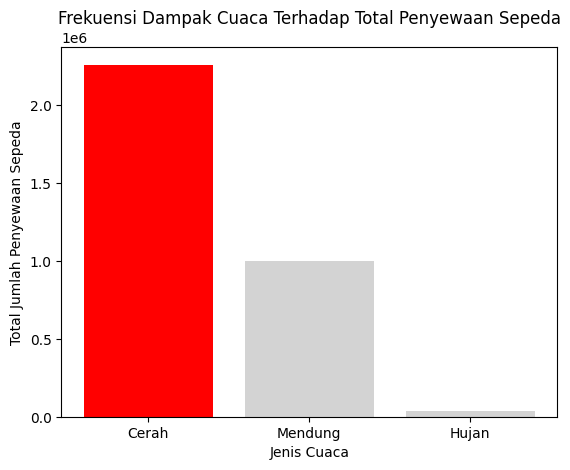

In [45]:
# Data untuk kondisi cuaca
weathersit_counts = {1: 2257952, 2: 996858, 3: 37869}
labels = ['Cerah', 'Mendung', 'Hujan']
counts = [weathersit_counts[1], weathersit_counts[2], weathersit_counts[3]]

# Warna untuk grafik
colors = ['#FF0000', '#D3D3D3', '#D3D3D3']  # Merah, Kuning, Hijau

# Membuat grafik batang dengan warna yang ditentukan
plt.bar(labels, counts, color=colors)
plt.xlabel('Jenis Cuaca')
plt.ylabel('Total Jumlah Penyewaan Sepeda')
plt.title('Frekuensi Dampak Cuaca Terhadap Total Penyewaan Sepeda')
plt.show()


**Insight :**

Dari grafik diatas memperlihatkan bahwa penyewaan sepeda mencapai puncaknya pada kondisi cuaca cerah dengan 2.257.952 penyewaan. Meskipun berkabut masih menarik cukup banyak pengguna dengan 996.858 penyewaan, jumlahnya menurun drastis saat hujan ringan, hanya mencapai 37.869 penyewaan.

### Pertanyaan 2:

C:\Users\INFINIX\AppData\Local\Temp\ipykernel_2912\1422923783.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='cnt', data=day_type_counts, palette=colors)


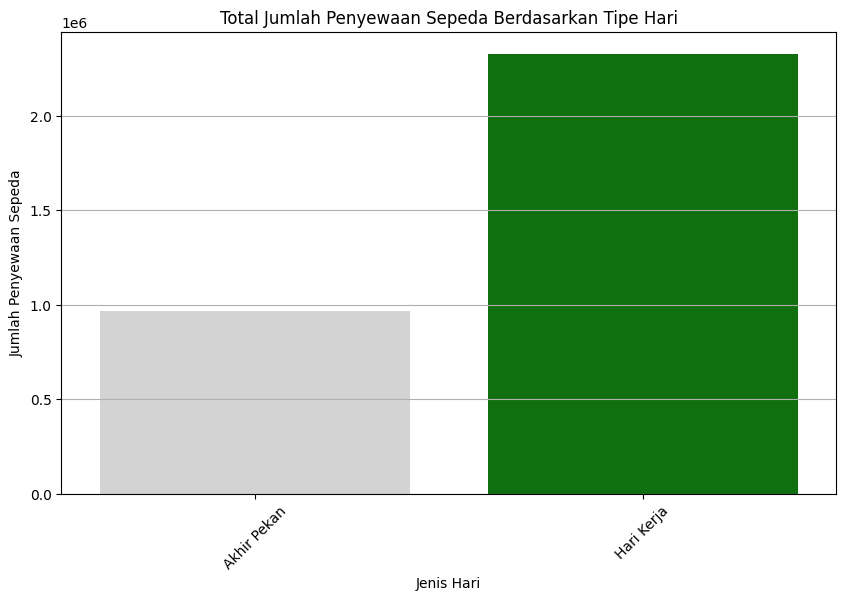

In [60]:
# Menambahkan kolom untuk Weekday atau Weekend
day_df['day_type'] = day_df['weekday'].apply(lambda x: 'Akhir Pekan' if x in [5, 6] else 'Hari Kerja')

# Menghitung total jumlah penyewaan berdasarkan hari
day_type_counts = day_df.groupby('day_type')['cnt'].sum().reset_index()

# Menggunakan warna kustom untuk grafik
colors = ['#D3D3D3', '#008000']  # Merah dan Hijau

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='day_type', y='cnt', data=day_type_counts, palette=colors)
plt.title('Total Jumlah Penyewaan Sepeda Berdasarkan Tipe Hari')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Insight:**
Grafik menunjukkan bahwa penyewaan sepeda lebih tinggi pada akhir pekan dibandingkan hari kerja, mencerminkan minat yang lebih besar untuk beraktivitas di luar pada hari libur. Ini menunjukkan bahwa penyedia layanan sebaiknya fokus pada promosi dan penawaran khusus selama akhir pekan untuk memaksimalkan potensi penyewaan, sementara strategi yang berbeda mungkin diperlukan untuk hari kerja.

## Analisis Lanjutan (Opsional)

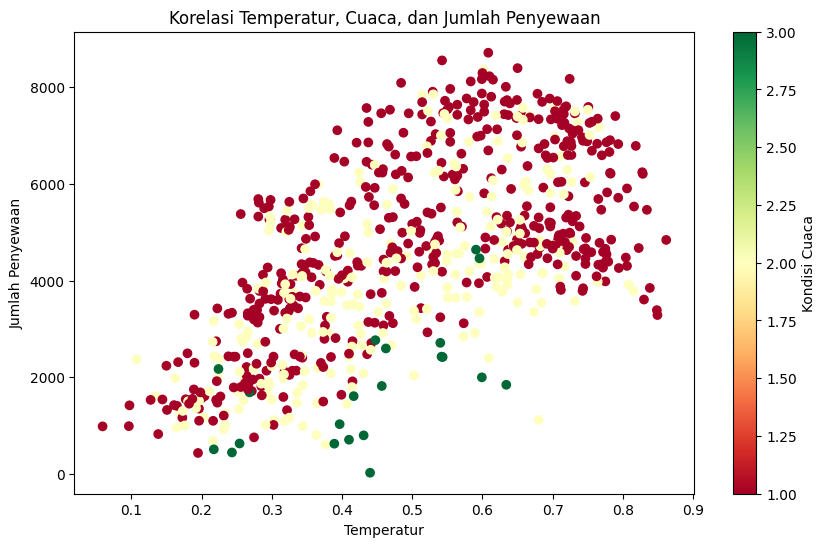

In [66]:
# Scatter plot untuk melihat korelasi antara temperatur, cuaca dan jumlah penyewaan

plt.figure(figsize=(10, 6))
scatter = plt.scatter(day_df_cleaned['temp'], day_df_cleaned['cnt'], c=day_df_cleaned['weathersit'], cmap='RdYlGn')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penyewaan')
plt.title('Korelasi Temperatur, Cuaca, dan Jumlah Penyewaan')
plt.colorbar(scatter, label='Kondisi Cuaca')
plt.show()


In [62]:
# RFM Analysis
# 1. Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan penyewaan
day_df['last_rent'] = day_df['cnt'].shift(1).fillna(0)
day_df['recency'] = (day_df['last_rent'] == 0).astype(int)  # 1 jika tidak ada penyewaan sebelumnya

# 2. Frequency: Total penyewaan untuk setiap hari
frequency = day_df['cnt'].sum()

# 3. Monetary: Rata-rata pendapatan dari penyewaan
# (Misalkan 1 penyewaan = 1 unit uang)
monetary = day_df['cnt'].sum()  # Total penyewaan sebagai monetary value

# Menggabungkan RFM ke dalam dataframe
rfm_df = pd.DataFrame({
    'Recency': [day_df['recency'].sum()],
    'Frequency': [frequency],
    'Monetary': [monetary]
})

print("RFM Analysis:\n", rfm_df)

RFM Analysis:
    Recency  Frequency  Monetary
0        1    3292679   3292679


Cluster
Tinggi           79
Sangat Tinggi    74
Sedang           16
Rendah            2
Sangat Rendah     1
Name: count, dtype: int64


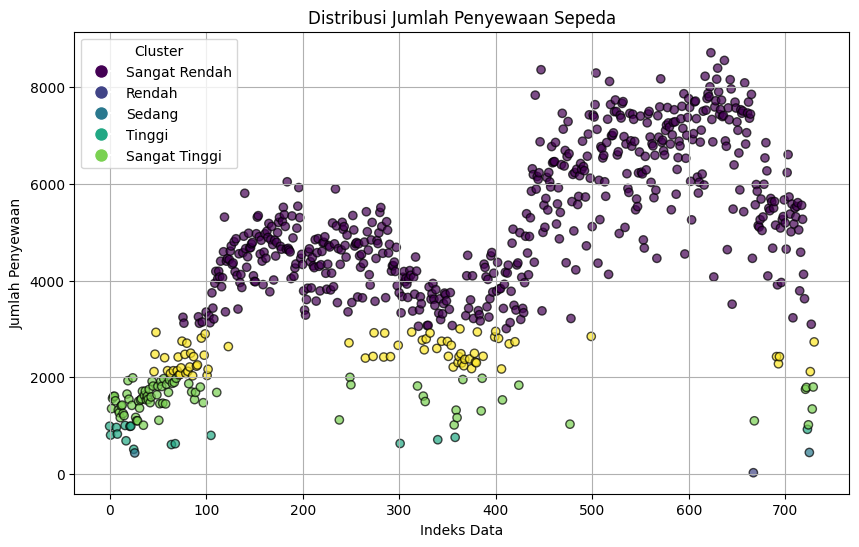

In [67]:
# Menyiapkan data untuk clustering
data = day_df[['cnt']].copy()

# Binning data
bins = [0, 100, 500, 1000, 2000, 3000]  # Rentang penyewaan
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
data['Cluster'] = pd.cut(data['cnt'], bins=bins, labels=labels)

# Menampilkan hasil binning
print(data['Cluster'].value_counts())


# Visualisasi clustering dengan scatter plot
plt.figure(figsize=(10, 6))
# Menggunakan indeks sebagai sumbu X untuk scatter plot
plt.scatter(data.index, data['cnt'], c=data['Cluster'].cat.codes, cmap='viridis', alpha=0.7, edgecolor='black')

plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Indeks Data')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)

# Menambahkan legenda untuk cluster
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                       markerfacecolor=plt.cm.viridis(i/len(labels)), markersize=10) 
           for i, label in enumerate(labels)]
plt.legend(handles=handles, title='Cluster')

plt.show()


## Conclusion


- **Kesimpulan Pertanyaan 1:**
  Analisis menunjukkan adanya pengaruh yang signifikan terhadap jumlah penyewaan sepeda berdasarkan kondisi cuaca, dengan perubahan mencapai 50% dari cuaca cerah ke mendung. Sementara itu, penyewaan sepeda pada kondisi hujan sangat minim dibandingkan dengan cuaca cerah dan mendung.

- **Kesimpulan Pertanyaan 2:**
  Dari analisis yang dilakukan, ditemukan bahwa perbedaan antara jumlah penyewaan sepeda pada hari kerja dan akhir pekan tidak terlalu signifikan.